# 介绍Tensorflow

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

## 1. 低阶API

### 1.1 张量的创建
#### 创建常量

In [3]:
tf1 = tf.constant(1.0) # 创建标量

In [4]:
print(tf1) # 打印张量的数值、尺寸、数据类型

tf.Tensor(1.0, shape=(), dtype=float32)


In [5]:
tf.print(tf1) # 只将张量的数值打印出来

1


In [6]:
tf2 = tf.constant([1, 2, 3]) # 创建一维向量
tf.print(tf2)

[1 2 3]


In [7]:
tf3 = tf.constant([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=tf.float64) # 创建二维张量
tf.print(tf3)

[[1 2 3 4]
 [5 6 7 8]
 [9 10 11 12]]


#### 创建变量

In [8]:
tv1 = tf.Variable([[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34]])
tf.print(tv1)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]


In [9]:
# 数组修改值
import numpy as np
array1 = np.array([[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34]])
print('before update:\n', array1)
array1[2, 2] = 333
print('after update:\n', array1)

before update:
 [[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]
after update:
 [[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32 333  34]]


In [10]:
'''
# 修改张量的值
print('before update:')
tf.print(tv1)
tv1[2, 2] = 333
print('after update:')
tf.print(tv1)
'''

"\n# 修改张量的值\nprint('before update:')\ntf.print(tv1)\ntv1[2, 2] = 333\nprint('after update:')\ntf.print(tv1)\n"

In [11]:
# 修改张量的值
print('before update:')
tf.print(tv1)
tv1[2, 2].assign(333) # 使用.assign修改指定索引位置上的元素
print('after update:')
tf.print(tv1)

before update:
[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]]
after update:
[[11 12 13 14]
 [21 22 23 24]
 [31 32 333 34]]


In [12]:
# 自加运算
print('before update:')
tf.print(tv1)
tv1.assign_add(tv1)
print('after update:')
tf.print(tv1)

before update:
[[11 12 13 14]
 [21 22 23 24]
 [31 32 333 34]]
after update:
[[22 24 26 28]
 [42 44 46 48]
 [62 64 666 68]]


In [13]:
# 自加运算
print('before update:')
tf.print(tv1)
tv1.assign_sub(tv1)
print('after update:')
tf.print(tv1)

before update:
[[22 24 26 28]
 [42 44 46 48]
 [62 64 666 68]]
after update:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


#### 创建全零张量

In [14]:
tz1 = tf.zeros([3, 3])
tf.print(tz1)

[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [15]:
tf.print(tf.zeros_like(tv1))

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


#### 创建全1张量

In [16]:
to1 = tf.ones([3, 3])
tf.print(to1)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [17]:
tf.print(tf.ones_like(tv1))

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


#### 创建均匀分布的随机张量

In [18]:
tu1 = tf.random.uniform((3, 3), minval=5, maxval=10, dtype=tf.int64)
tf.print(tu1)

[[9 6 7]
 [9 9 6]
 [5 7 5]]


In [19]:
tf.random.set_seed(123) # 设置随机种子数
tf.print(tf.random.normal(shape=(3, 3)))

[[-0.898083687 -1.82591438 -0.444418073]
 [-1.48829472 -0.785546303 0.196196556]
 [0.17604655 -1.52525055 0.635294]]


#### 创建连续张量

In [20]:
tf.print(tf.range(start=0, limit=10, delta=2)) # start: 起点, limit: 终点, delta: 步长

[0 2 4 6 8]


In [21]:
tf.linspace(0, 10, 11)

<tf.Tensor: shape=(11,), dtype=float64, numpy=array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])>

### 1.2 张量的索引

In [22]:
tf.random.set_seed(1234)
tu2 = tf.random.uniform((5, 5), minval=5, maxval=100, dtype=tf.int64)
tf.print(tu2)

[[95 51 41 12 23]
 [27 53 83 46 93]
 [20 21 52 19 22]
 [96 33 84 44 43]
 [62 75 23 31 88]]


#### 索引

In [23]:
tf.print(tu2[3, 3]) # 指定位置的索引

44


In [24]:
index = [[3, 3], [4, 4]]
tf.print(tf.gather_nd(tu2, index))

[44 88]


#### 切片

In [25]:
tf.print(tu2[2:4, 2:])

[[52 19 22]
 [84 44 43]]


In [26]:
tf.print(tu2)

[[95 51 41 12 23]
 [27 53 83 46 93]
 [20 21 52 19 22]
 [96 33 84 44 43]
 [62 75 23 31 88]]


In [27]:
tf.print(tf.slice(input_=tu2, begin=[2, 2], size=[2, 3])) # input_: 待切片的张量, begin: [开始的行索引, 开始的列索引], size: [取出的行数, 取出的列数]

[[52 19 22]
 [84 44 43]]


#### 取出指定的行和指定的列

In [28]:
tf.print(tu2[:,2])

[41 83 52 84 23]


In [29]:
tf.print(tf.gather(tu2, [2, 4, 1], axis=1))

[[41 23 51]
 [83 93 53]
 [52 22 21]
 [84 43 33]
 [23 88 75]]


### 1.3 维度变换

In [30]:
tu3 = tf.random.uniform((1, 3, 4), minval=5, maxval=10, dtype=tf.int64)

In [31]:
tu4 = tf.reshape(tu3, shape=(4, 3)) # 修改尺寸，须保证数据的大小不变
tf.print(tu4)

[[5 6 5]
 [6 9 8]
 [8 5 8]
 [8 6 7]]


In [32]:
tf.print(tf.squeeze(tu3).shape) # tf.squeeze() 删除尺寸为1的位置

TensorShape([3, 4])


In [33]:
tf.print(tf.expand_dims(tu3, -1).shape) # tf.expand_dims() 增加尺寸为1的位置

TensorShape([1, 3, 4, 1])


In [34]:
tf.print(tf.transpose(tu4)) # 张量的转置

[[5 6 8 8]
 [6 9 5 6]
 [5 8 8 7]]


### 1.4 张量的合并和分割

In [35]:
tf.random.set_seed(1234)
tf1 = tf.random.uniform((4, 4), minval=5, maxval=100, dtype=tf.int64)
tf2 = tf.random.uniform((4, 4), minval=5, maxval=100, dtype=tf.int64)

In [36]:
tf.print(tf1), tf.print(tf2)

[[95 51 41 12]
 [23 27 53 83]
 [46 93 20 21]
 [52 19 22 96]]
[[80 66 45 36]
 [94 58 18 70]
 [63 83 76 22]
 [62 60 89 15]]


(None, None)

#### 横向合并

In [37]:
tf.print(tf.concat([tf1, tf2], axis=1))
tf.concat([tf1, tf2], axis=1).shape

[[95 51 41 ... 66 45 36]
 [23 27 53 ... 58 18 70]
 [46 93 20 ... 83 76 22]
 [52 19 22 ... 60 89 15]]


TensorShape([4, 8])

#### 纵向合并

In [38]:
tf.print(tf.concat([tf1, tf2], axis=0))
tf.concat([tf1, tf2], axis=0).shape

[[95 51 41 12]
 [23 27 53 83]
 [46 93 20 21]
 ...
 [94 58 18 70]
 [63 83 76 22]
 [62 60 89 15]]


TensorShape([8, 4])

#### 横向分割

In [39]:
tf.print(tf.split(tf1, 2, axis=0))

[[[95 51 41 12]
 [23 27 53 83]], [[46 93 20 21]
 [52 19 22 96]]]


#### 纵向分割

In [40]:
tf.print(tf.split(tf1, 2, axis=1))

[[[95 51]
 [23 27]
 [46 93]
 [52 19]], [[41 12]
 [53 83]
 [20 21]
 [22 96]]]


### 1.5 张量的计算

In [41]:
tf.print(tf1)
tf.print(tf2)

[[95 51 41 12]
 [23 27 53 83]
 [46 93 20 21]
 [52 19 22 96]]
[[80 66 45 36]
 [94 58 18 70]
 [63 83 76 22]
 [62 60 89 15]]


In [42]:
tf.print(tf1 + tf2) # 对应元素相运算

[[175 117 86 48]
 [117 85 71 153]
 [109 176 96 43]
 [114 79 111 111]]


In [43]:
print('tf1:', tf1.dtype) # 两个张量的数据类型必须一致
print('tf2:', tf2.dtype)

tf1: <dtype: 'int64'>
tf2: <dtype: 'int64'>


In [44]:
tf3 = tf.cast(tf1, tf.float32)
print('tf3:', tf3.dtype)

tf3: <dtype: 'float32'>


In [45]:
# tf2 + tf3 # 张量的数据类型不一致，无法运算

In [46]:
tf4 = tf.cast(tf2, dtype=tf.float64)
print(tf4.dtype)

<dtype: 'float64'>


In [47]:
# tf3 + tf4

### 1.6 tensorflow中的自微分机制

函数为：
$$
y=x^2-2x+1
$$

In [48]:
x = tf.Variable(1.0, dtype=tf.float32) # 默认的张量精度为单精度浮点型（tf.float32）
a = tf.constant(1.0)
b = tf.constant(-2.0)
c = tf.constant(1.0)
with tf.GradientTape() as tape:
    y = a * tf.pow(x, 2) + b*x + c

In [49]:
dy_dx = tape.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [50]:
with tf.GradientTape() as tape0:
    with tf.GradientTape() as tape:
        y = a * tf.pow(x, 2) + b*x + c
    dy_dx = tape.gradient(y, x)

In [51]:
dy2_dx2 = tape0.gradient(dy_dx, x)

In [52]:
dy2_dx2

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

### 1.7 使用tensorflow对一元线性回归进行参数优化

In [53]:
data = np.loadtxt('../data/line_fit_data.csv', skiprows=1, delimiter=',')

In [54]:
x_data = tf.constant(data[:,0], dtype=tf.float32)
y_data = tf.constant(data[:,1], dtype=tf.float32) # 分离特征和标签

In [55]:
params = tf.Variable(tf.random.normal(shape=(2,)))
params

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([ 0.95883226, -0.3325803 ], dtype=float32)>

In [56]:
# 学习率、最大迭代次数
yita, epochs = 0.5, 10

In [57]:
# 定义模型函数
def line_model(x, w, b):
    return x*w + b

In [58]:
# 定义损失函数
def loss(y_true, y_pred):
    return 1/2 * tf.pow(y_true - y_pred, 2)

In [59]:
for epoch in range(epochs):
    for line in range(len(x_data)):
        x = x_data[line]
        y = y_data[line]
        with tf.GradientTape() as grad:
            y_pred = line_model(x, params[0], params[1])
            error = loss(y, y_pred)
        d_params = grad.gradient(error, params)
        params.assign_sub(d_params * yita)
    print('epoch:{}, w:{}, b:{}, error:{}'.format(epoch, params.numpy()[0], params.value()[1], error))

epoch:0, w:2.5806806087493896, b:3.981973648071289, error:0.0002462636330164969
epoch:1, w:2.5037715435028076, b:3.999157428741455, error:5.383044481277466e-07
epoch:2, w:2.500175952911377, b:3.9999608993530273, error:1.1827978596556932e-09
epoch:3, w:2.5000078678131104, b:3.9999983310699463, error:2.8421709430404007e-12
epoch:4, w:2.5, b:4.0, error:0.0
epoch:5, w:2.499999761581421, b:4.0, error:0.0
epoch:6, w:2.499999761581421, b:4.0, error:0.0
epoch:7, w:2.499999761581421, b:4.0, error:0.0
epoch:8, w:2.499999761581421, b:4.0, error:0.0
epoch:9, w:2.499999761581421, b:4.0, error:0.0


### 1.8 张量和数组间的相互转化

In [60]:
array2 = np.array([5, 7, 9, 2])

#### 数组转化为张量

In [61]:
array2tensor = tf.constant(array2)
array2tensor

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([5, 7, 9, 2])>

In [62]:
array2tensor2 = tf.Variable(array2)
array2tensor2

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([5, 7, 9, 2])>

#### 张量转化为数组

In [63]:
tensor2numpy = array2tensor.numpy()
tensor2numpy

array([5, 7, 9, 2])

In [64]:
tensor2array2 = np.array(array2tensor2)
tensor2array2

array(<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([5, 7, 9, 2])>,
      dtype=object)

## 2. 中阶API

### 2.1 激活函数
一般作用于单个神经元的输出，我们需要利用非线性激活函数想模型中引入非线性特征，用来拟合非线性数据。

In [65]:
from tensorflow.keras import activations

In [66]:
# activations.sigmoid()
# activations.relu()
# activations.softmax()

### 2.2 模型层
构成模型的主要原件

In [67]:
from tensorflow.keras import layers

In [68]:
# layers.Dense() # 全连接层
# layers.Conv2D() # 二维卷积层
# layers.MaxPool2D() # 最大池化层
# layers.Flatten() # 展平层
# layers.BatchNormalization() # 批标准化层
# layers.Dropout() # 暂退法，丢弃层，随机取某些神经元不参与模型的更新

### 2.3 损失函数

In [69]:
from tensorflow.keras import losses

In [70]:
# 分类
# losses.binary_crossentropy # 二进制交叉熵（处理二分类）
# losses.categorical_crossentropy # 多分类交叉熵
# losses.sparse_categorical_crossentropy # 稀疏的多分类交叉熵

# 回归任务
# losses.mse() # 均方误差
# losses.mean_squared_error() # 均方误差
# losses.mean_squard_logarithmic_error # 对数均方误差
# losses.mean_absolute_error() # 绝对误差

### 2.4 评估函数

In [71]:
from tensorflow.keras import metrics

In [72]:
# 分类任务
# metrics.Accuracy() # 精度
# metrics.binary_accuracy # 二分类精度
# metrics.categorical_accuracy # 多分类精度
# metrics.sparse_categorical_accuracy # 稀疏多分类精度
# metrics.Poisson() # 准确率
# metrics.Recall() # 召回率
# metrics.IoU()
# metrics.AUC()

In [73]:
# 回归任务
# losses.mse() # 均方误差
# losses.mean_squared_error() # 均方误差
# losses.mean_squard_logarithmic_error # 对数均方误差
# losses.mean_absolute_error() # 绝对误差

### 2.5 优化器

In [74]:
from tensorflow.keras import optimizers

In [75]:
# optimizers.SGD() # 随机梯度下降法
# optimizers.Adam() # 自适应梯度下降法

### 2.6 使用中阶API简化一元线性回归模型

In [76]:
data = np.loadtxt('../data/line_fit_data.csv', skiprows=1, delimiter=',')

In [77]:
x_data = tf.constant(data[:,0], dtype=tf.float32)
y_data = tf.constant(data[:,1], dtype=tf.float32) # 分离特征和标签

In [78]:
params = tf.Variable(tf.random.normal(shape=(2,)))
params

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([-0.37767014, -0.2148674 ], dtype=float32)>

In [79]:
# 学习率、最大迭代次数
yita, epochs = 0.5, 10

In [80]:
def line_model(x, w, b):
    return x*w + b

In [81]:
for epoch in range(epochs):
    for line in range(len(x_data)):
        x = x_data[line:line+1]
        y = y_data[line:line+1]
        with tf.GradientTape() as grad:
            y_pred = line_model(x, params[0], params[1])
            error = losses.mse(y, y_pred)
        d_params = grad.gradient(error, params)
        sgd = optimizers.SGD(learning_rate=yita)
        sgd.apply_gradients(grads_and_vars=[(d_params, params)])
    if error < 1e-20:
        print('Early Stop!')
    else:
        print('epoch:{}, w:{}, b:{}, error:{}'.format(epoch, params.numpy()[0], params.value()[1], error))

epoch:0, w:2.5038740634918213, b:3.9996674060821533, error:3.012248726008693e-07
epoch:1, w:2.5000088214874268, b:3.9999992847442627, error:9.094947017729282e-13
Early Stop!
Early Stop!
Early Stop!
Early Stop!
Early Stop!
Early Stop!
Early Stop!
Early Stop!


## 3. 高阶API

### 3.1 准备数据

In [82]:
from sklearn.datasets import load_iris

In [83]:
X, y = load_iris()['data'], load_iris()['target']
print(X.shape, y.shape)

(150, 4) (150,)


### 3.2 模型的搭建
- 定义BP神经网络模型
- hidden_num = (5, 6, 3)

In [84]:
from tensorflow.keras import layers

#### 顺序式

In [85]:
from tensorflow import keras

In [86]:
model1 = keras.Sequential() # 定义一个容器
model1.add(layers.Dense(5, input_shape=(4,), activation='relu'))
model1.add(layers.Dense(6, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

In [87]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


#### 函数式

In [88]:
inputs = keras.Input(shape=(4,))
hidden1 = layers.Dense(5, activation='relu')(inputs)
hidden2 = layers.Dense(6, activation='relu')(hidden1)
outputs = layers.Dense(3, activation='softmax')(hidden2)
model2 = keras.Model(inputs=inputs, outputs=outputs)

In [89]:
model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 21        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


#### 子类式

In [90]:
class MyModel(keras.models.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden1 = layers.Dense(5, activation='relu')
        self.hidden2 = layers.Dense(6, activation='relu')
        self.outputs = layers.Dense(3, activation='softmax')
    
    def call(self, x):
        x = self.hidden1(x)
        x = self.hidden2(x)
        output = self.outputs(x)
        return output

In [91]:
# 实例化模型
myModel = MyModel()
myModel.build(input_shape=(1, 4))

In [92]:
myModel.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  25        
_________________________________________________________________
dense_7 (Dense)              multiple                  36        
_________________________________________________________________
dense_8 (Dense)              multiple                  21        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


### 3.3 模型的编译

In [93]:
model1.compile(loss=losses.sparse_categorical_crossentropy, metrics=metrics.sparse_categorical_accuracy, optimizer=optimizers.Adam())

### 3.4 模型的训练

In [94]:
history = model1.fit(x=X, y=y, batch_size=4, epochs=500, validation_split=0.1)

Epoch 1/500
34/34 [==============================] - 0s 6ms/step - loss: 1.0105 - sparse_categorical_accuracy: 0.6593 - val_loss: 1.1166 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 0.9557 - sparse_categorical_accuracy: 0.6074 - val_loss: 1.1233 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 0.9209 - sparse_categorical_accuracy: 0.6370 - val_loss: 1.1341 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 0.8856 - sparse_categorical_accuracy: 0.6296 - val_loss: 1.1387 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 0.8499 - sparse_categorical_accuracy: 0.6667 - val_loss: 1.1454 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 0.8173 - spa

### 3.5 模型的保存与读取

#### 保存整个模型

In [95]:
model1.save('../models/model.h5')

#### 保存模型参数

In [96]:
model1.save_weights('../models/model_weight.h5')

#### 读取整个模型

In [97]:
upload_model = keras.models.load_model('../models/model.h5')
upload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________


#### 加载模型参数

In [98]:
model1.load_weights('../models/model_weight.h5')

### 3.6 模型的可视化

In [99]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

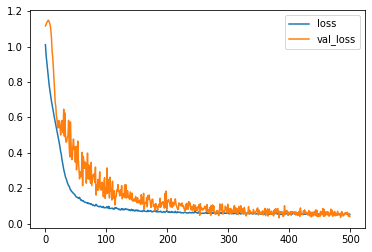

In [100]:
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['loss'])), history.history['loss'])
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

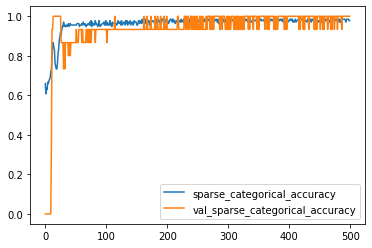

In [101]:
plt.plot(range(len(history.history['sparse_categorical_accuracy'])), history.history['sparse_categorical_accuracy'])
plt.plot(range(len(history.history['val_sparse_categorical_accuracy'])), history.history['val_sparse_categorical_accuracy'])
plt.legend(['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy'])
plt.show()

#### 可视化整个模型

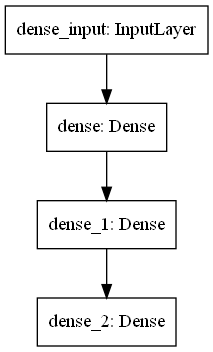

In [102]:
keras.utils.plot_model(model1, to_file='../imgs/simple_model.png')